In [ ]:
  !pip install google-colab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 19.0 MB/s eta 0:00:00


In [ ]:
import SimpleITK as sitk


In [ ]:
mri_path= "/content/drive/MyDrive/Data/BraTS2021_00621_flair.nii.gz"
mri_seg_path= "/content/drive/MyDrive/Data/BraTS2021_00621_seg.nii.gz"
ct_path =  "/content/drive/MyDrive/Data/volume-0.nii"
ct_seg_path = "/content/drive/MyDrive/Data/segmentation-0.nii"




In [ ]:
mri_seg_path

'/content/drive/MyDrive/Data/BraTS2021_00621_seg.nii.gz'

In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/Data/BraTS2021_00000_seg.nii.gz'))


False


In [ ]:
img_array = sitk.GetArrayFromImage(sitk.ReadImage(mri_path, sitk.sitkFloat32))


In [ ]:
seg_array = sitk.GetArrayFromImage(sitk.ReadImage(mri_seg_path, sitk.sitkFloat32))

In [ ]:
slice = img_array.shape[0]//2
img_slice = img_array[slice]
seg_slice = seg_array[slice]


In [ ]:
img_array

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
import matplotlib.pyplot as plt
def plotImage(image, slices):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5),)
    fig.suptitle('Original Image, slices: ' + str(slices), fontsize=20)
    ax1.imshow(image[slices[0], :, :], cmap='gray'); ax1.axis('off'); ax1.set_title('Axial', fontsize=16)
    ax2.imshow(image[::-1,slices[1],::-1], cmap='gray'); ax2.axis('off'); ax2.set_title('Coronal', fontsize=16)
    ax3.imshow(image[::-1,:,slices[2]], cmap='gray'); ax3.axis('off'); ax3.set_title('Sagittal', fontsize=16)
    plt.show()

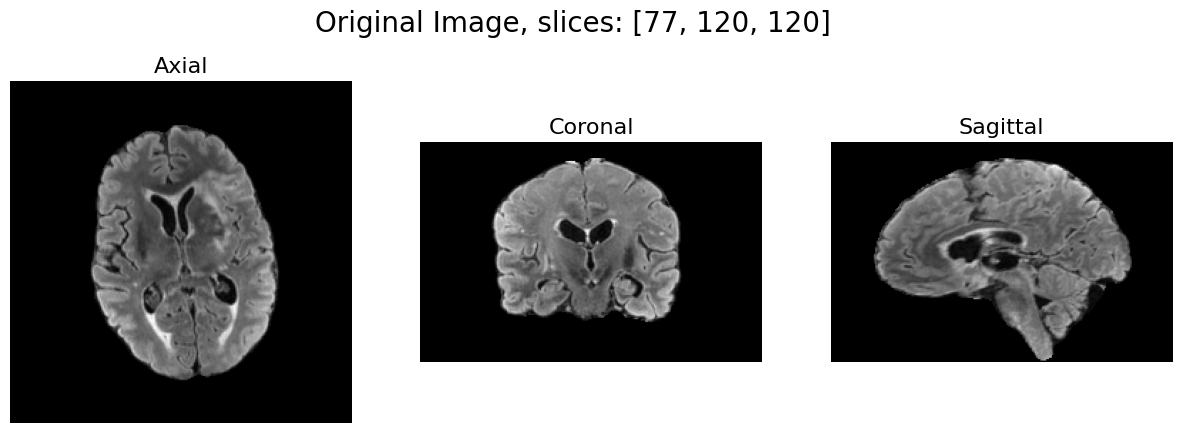

In [ ]:
 slices = [img_array.shape[0]//2, img_array.shape[1]//2, img_array.shape[2]//2]
plotImage(img_array, slices)

In [ ]:
from tkinter import font
import scipy.ndimage as ndimage


In [ ]:
out_nearest = ndimage.zoom(img_slice, 2.0, order=0)
out_bilinear = ndimage.zoom(img_slice, 2.0, order=1)
out_cubic = ndimage.zoom(img_slice, 2.0, order=3)

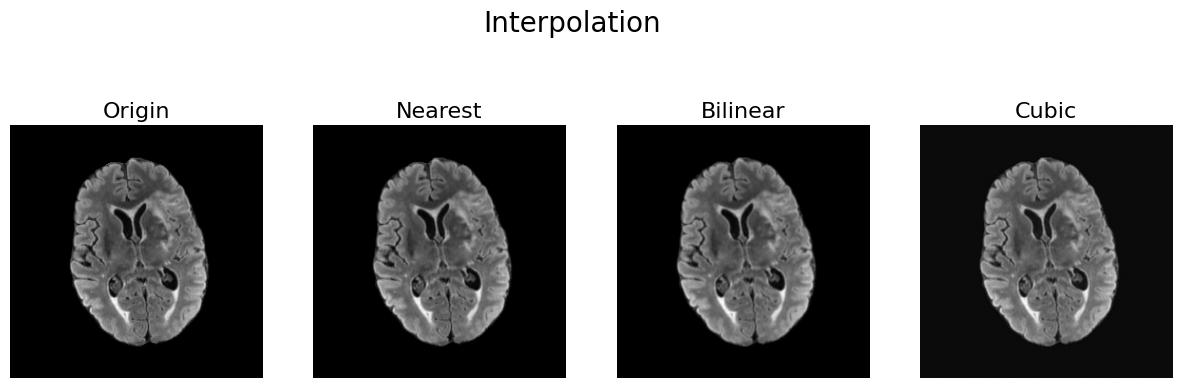

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(out_nearest, cmap='gray'); ax2.set_title("Nearest", fontsize=16); ax2.axis('off')
ax3.imshow(out_bilinear, cmap='gray'); ax3.set_title("Bilinear", fontsize=16); ax3.axis('off')
ax4.imshow(out_cubic, cmap='gray'); ax4.set_title("Cubic", fontsize=16); ax4.axis('off')
fig.suptitle('Interpolation', fontsize=20)
plt.show()


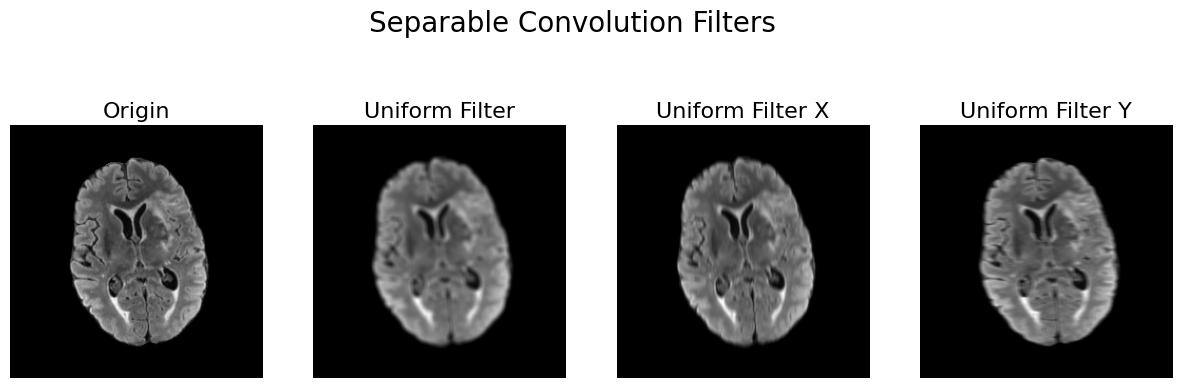

In [ ]:
result = ndimage.uniform_filter(img_slice, size=5)
result_x = ndimage.uniform_filter1d(img_slice, size=5, axis=0)
result_y = ndimage.uniform_filter1d(img_slice, size=5, axis=1)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result, cmap='gray'); ax2.set_title("Uniform Filter", fontsize=16); ax2.axis('off')
ax3.imshow(result_x, cmap='gray'); ax3.set_title("Uniform Filter X", fontsize=16); ax3.axis('off')
ax4.imshow(result_y, cmap='gray'); ax4.set_title("Uniform Filter Y", fontsize=16); ax4.axis('off')
fig.suptitle('Separable Convolution Filters', fontsize=20)
plt.show()

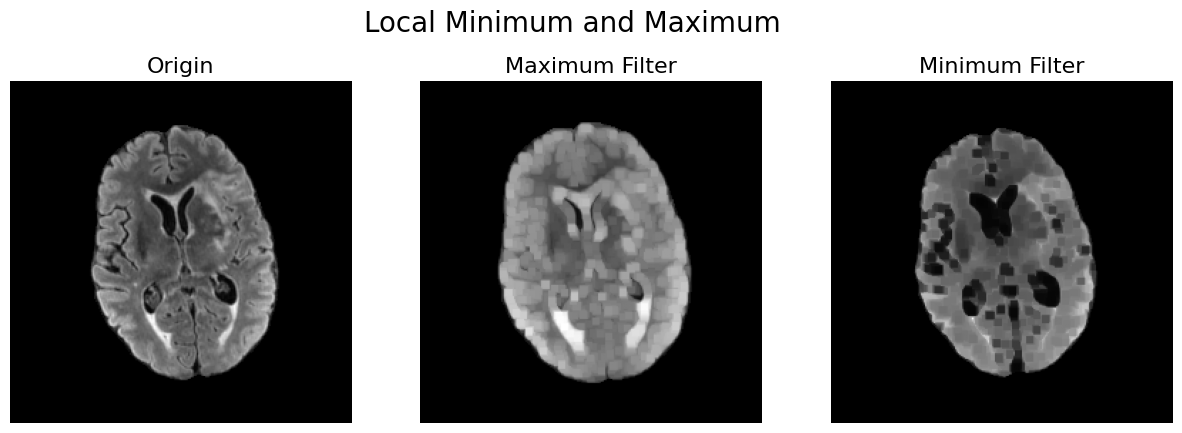

In [ ]:
result_maximum_filter = ndimage.maximum_filter(img_slice, size=5)
result_minimum_filter = ndimage.minimum_filter(img_slice, size=5)

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result_maximum_filter, cmap='gray'); ax2.set_title("Maximum Filter", fontsize=16); ax2.axis('off')
ax3.imshow(result_minimum_filter, cmap='gray'); ax3.set_title("Minimum Filter", fontsize=16); ax3.axis('off')
fig.suptitle('Local Minimum and Maximum', fontsize=20)
plt.show()

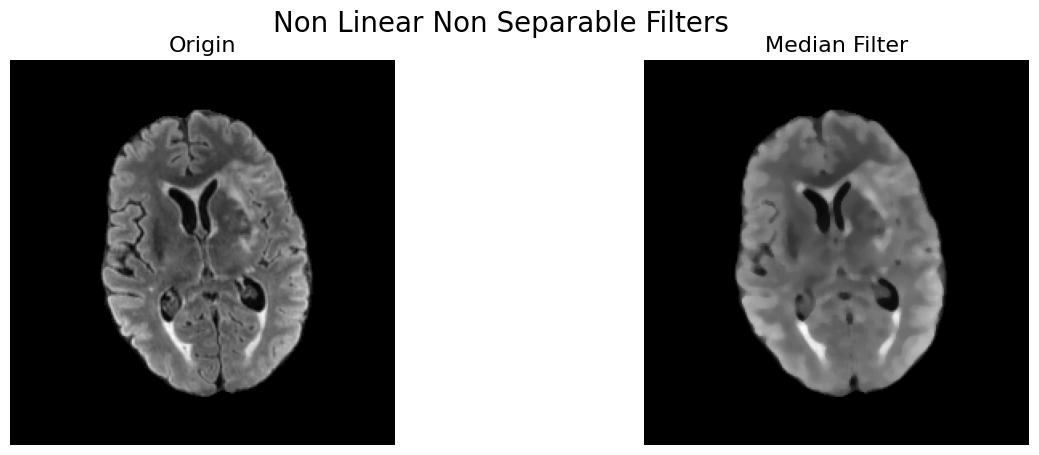

In [ ]:
result_median_filter = ndimage.median_filter(img_slice, size=5)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result_median_filter, cmap='gray'); ax2.set_title("Median Filter", fontsize=16); ax2.axis('off')
fig.suptitle('Non Linear Non Separable Filters', fontsize=20)
plt.show()

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter1d, convolve1d, maximum_filter1d, minimum_filter1d, uniform_filter1d


In [ ]:
rng = np.random.default_rng()

x = rng.standard_normal(101).cumsum()

result_conolve1d = convolve1d(x, weights=[1,1])

result_gaussian_filter1d_sigma3 = gaussian_filter1d(x, sigma=3)
result_gaussian_filter1d_sigma6 = gaussian_filter1d(x, sigma=6)

result_maximum_filter1d = maximum_filter1d(x, size=3)
result_minimum_filter1d = minimum_filter1d(x, size=3)
result_uniform_filter1d = uniform_filter1d(x, size=3)


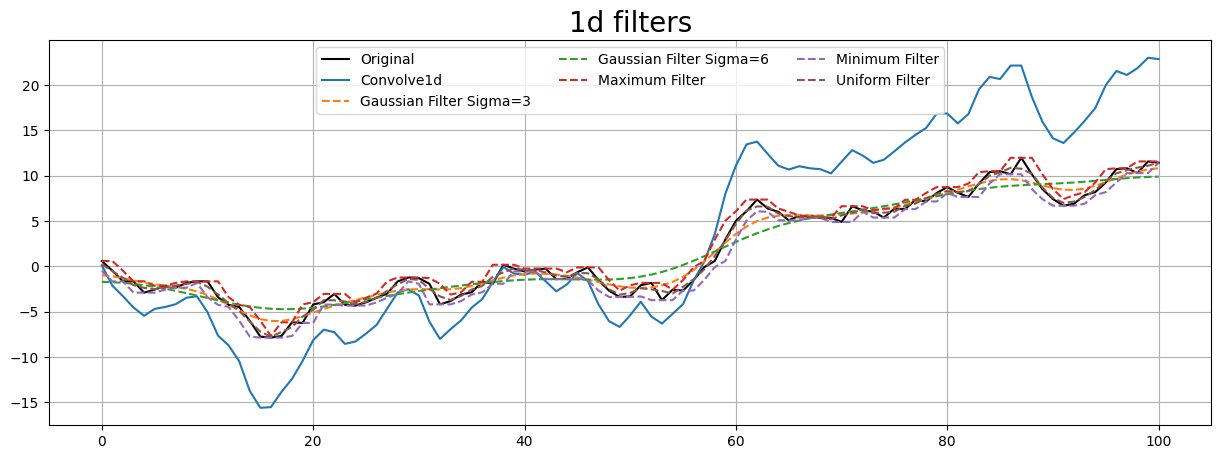

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.plot(x,'k', label='Original')
plt.plot(result_conolve1d, '-', label='Convolve1d')
plt.plot(result_gaussian_filter1d_sigma3, '--', label='Gaussian Filter Sigma=3')
plt.plot(result_gaussian_filter1d_sigma6, '--', label='Gaussian Filter Sigma=6')
plt.plot(result_maximum_filter1d, '--', label='Maximum Filter')
plt.plot(result_minimum_filter1d, '--', label='Minimum Filter')
plt.plot(result_uniform_filter1d, '--', label='Uniform Filter')

plt.legend(loc= "upper center", ncol=3)
plt.grid()
plt.title("1d filters", fontsize=20)
plt.show()

In [ ]:
import numpy as np
from scipy import ndimage
import warnings
import pylab as pl
from time import sleep
def anisodiff(img,niter=1,kappa=50,gamma=0.1,step=(1.,1.),sigma=0, option=1,ploton=False):



	if img.ndim == 3:
		warnings.warn("Only grayscale images allowed, converting to 2D matrix")
		img = img.mean(2)


	img = img.astype('float32')
	imgout = img.copy()

	deltaS = np.zeros_like(imgout)
	deltaE = deltaS.copy()
	NS = deltaS.copy()
	EW = deltaS.copy()
	gS = np.ones_like(imgout)
	gE = gS.copy()


	if ploton:


		fig = pl.figure(figsize=(20,5.5),num="Anisotropic diffusion")
		ax1,ax2 = fig.add_subplot(1,2,1),fig.add_subplot(1,2,2)

		ax1.imshow(img,interpolation='nearest')
		ih = ax2.imshow(imgout,interpolation='nearest',animated=True)
		ax1.set_title("Original image")
		ax2.set_title("Iteration 0")

		fig.canvas.draw()

	for ii in np.arange(1,niter):


		deltaS[:-1,: ] = np.diff(imgout,axis=0)
		deltaE[: ,:-1] = np.diff(imgout,axis=1)

		if 0<sigma:
			deltaSf=ndimage.gaussian_filter(deltaS,sigma)
			deltaEf=ndimage.gaussian_filter(deltaE,sigma)
		else:
			deltaSf=deltaS
			deltaEf=deltaE


		if option == 1:
			gS = np.exp(-(deltaSf/kappa)**2.)/step[0]
			gE = np.exp(-(deltaEf/kappa)**2.)/step[1]
		elif option == 2:
			gS = 1./(1.+(deltaSf/kappa)**2.)/step[0]
			gE = 1./(1.+(deltaEf/kappa)**2.)/step[1]


		E = gE*deltaE
		S = gS*deltaS


		NS[:] = S
		EW[:] = E
		NS[1:,:] -= S[:-1,:]
		EW[:,1:] -= E[:,:-1]


		imgout += gamma*(NS+EW)

		if ploton:
			iterstring = "Iteration %i" %(ii+1)
			ih.set_data(imgout)
			ax2.set_title(iterstring)
			fig.canvas.draw()


	return imgout

In [ ]:
result_gaussian_filter1d = ndimage.gaussian_filter(img_slice, sigma=5)

k = np.array([[1,2,1],[2,4,2],[1,2,1]])
k = k/k.sum()

result_binomial_filter = ndimage.convolve(img_slice, k, mode="constant", cval=0.0)
result_anisotropic_filter = anisodiff(img_slice,100,20,0.075,(1,1),2.5,1)

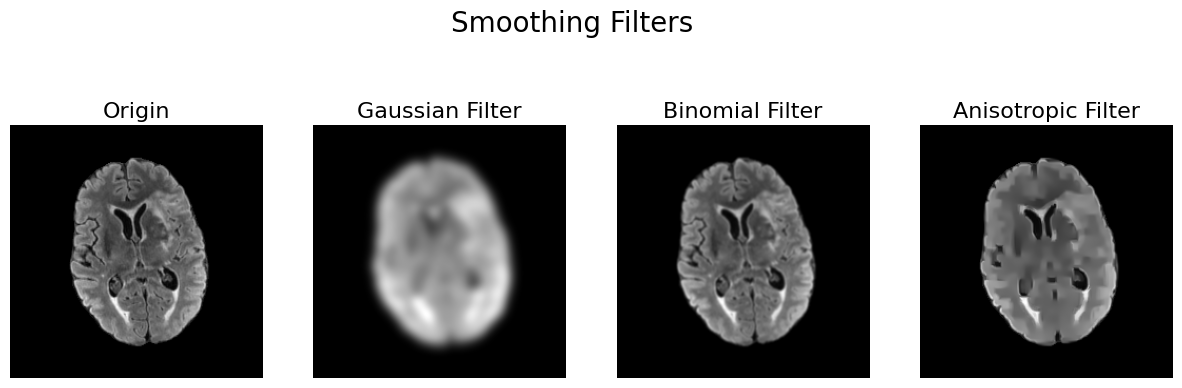

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result_gaussian_filter1d, cmap='gray'); ax2.set_title("Gaussian Filter", fontsize=16); ax2.axis('off')
ax3.imshow(result_binomial_filter, cmap='gray'); ax3.set_title("Binomial Filter", fontsize=16); ax3.axis('off')
ax4.imshow(result_anisotropic_filter, cmap='gray'); ax4.set_title("Anisotropic Filter", fontsize=16); ax4.axis('off')
fig.suptitle('Smoothing Filters', fontsize=20)
plt.show()

In [ ]:
!pip install itk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 63.5 MB/s eta 0:00:00


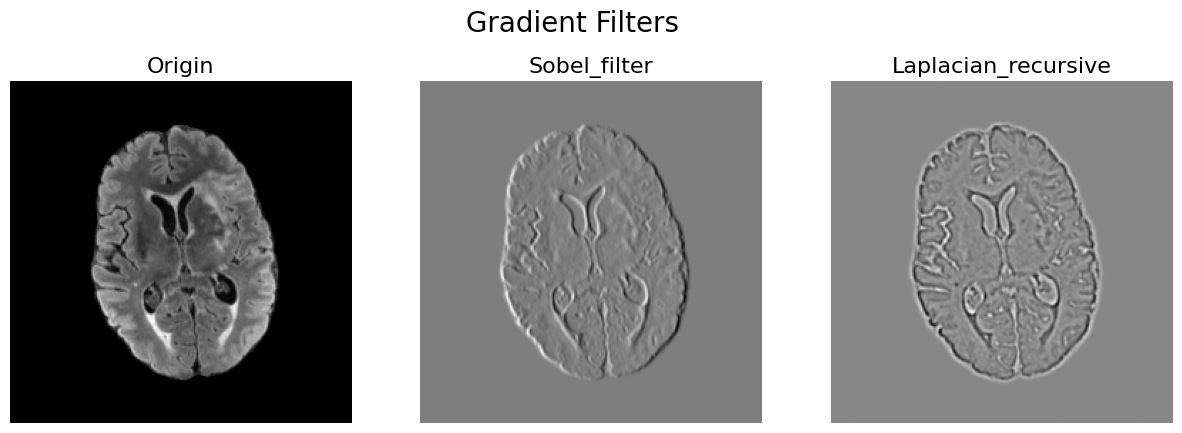

In [ ]:
import itk


result_sobel_filter = ndimage.sobel(img_slice)
result_recursive_gaussian_filter = itk.laplacian_recursive_gaussian_image_filter(img_slice)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result_sobel_filter, cmap='gray'); ax2.set_title("Sobel_filter", fontsize=16); ax2.axis('off')
ax3.imshow(result_recursive_gaussian_filter, cmap='gray'); ax3.set_title("Laplacian_recursive", fontsize=16); ax3.axis('off')
fig.suptitle('Gradient Filters', fontsize=20)
plt.show()

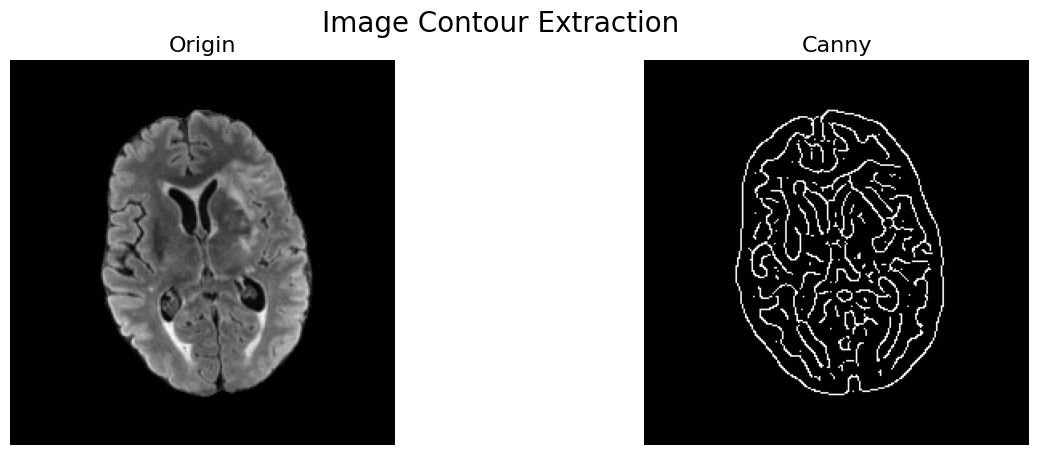

In [ ]:
from skimage import feature

edges = feature.canny(img_slice, sigma=3)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(edges, cmap='gray'); ax2.set_title("Canny", fontsize=16); ax2.axis('off')
fig.suptitle('Image Contour Extraction', fontsize=20)
plt.show()

In [ ]:
from skimage.morphology import square
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import binary_erosion, binary_opening, binary_closing,  binary_dilation
from scipy.ndimage import morphological_gradient


`square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
`square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
`square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
`square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.


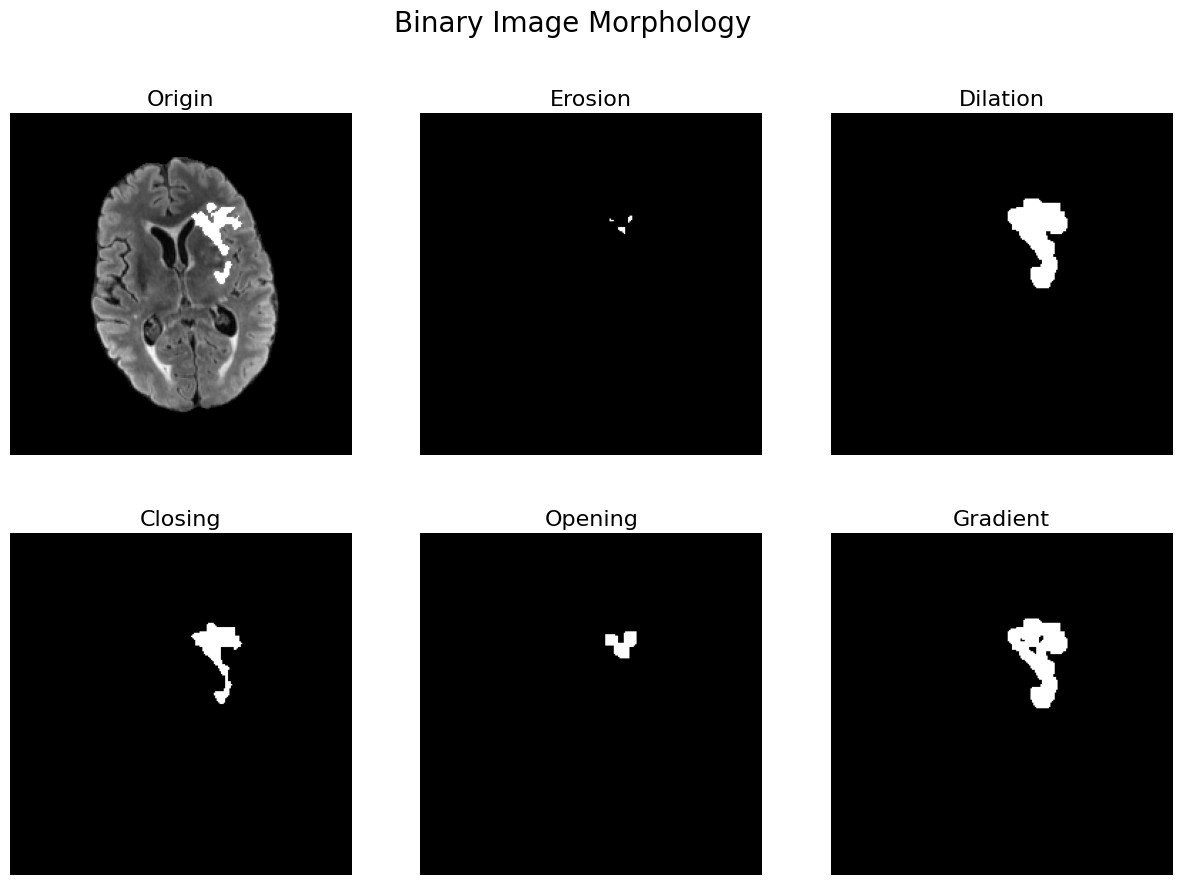

In [ ]:
seg_slice[seg_slice>=1] = 1
resutls_binary_erosion = binary_erosion(seg_slice, square(7))
resutls_binary_dilation = binary_dilation(seg_slice, square(7))
resutls_binary_closing = binary_closing(seg_slice, square(7))
resutls_binary_opening = binary_opening(seg_slice, square(7))
resutls_binary_gradient = morphological_gradient(seg_slice, size=(7,7))

fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
max_val = img_slice.max()
img_slice[seg_slice==1]=max_val
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(resutls_binary_erosion, cmap='gray'); ax2.set_title("Erosion", fontsize=16); ax2.axis('off')
ax3.imshow(resutls_binary_dilation, cmap='gray'); ax3.set_title("Dilation", fontsize=16); ax3.axis('off')

ax4.imshow(resutls_binary_closing, cmap='gray'); ax4.set_title("Closing", fontsize=16); ax4.axis('off')
ax5.imshow(resutls_binary_opening, cmap='gray'); ax5.set_title("Opening", fontsize=16); ax5.axis('off')
ax6.imshow(resutls_binary_gradient, cmap='gray'); ax6.set_title("Gradient", fontsize=16); ax6.axis('off')

fig.suptitle('Binary Image Morphology', fontsize=20)
plt.show()

`square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
`square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
`square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
`square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.


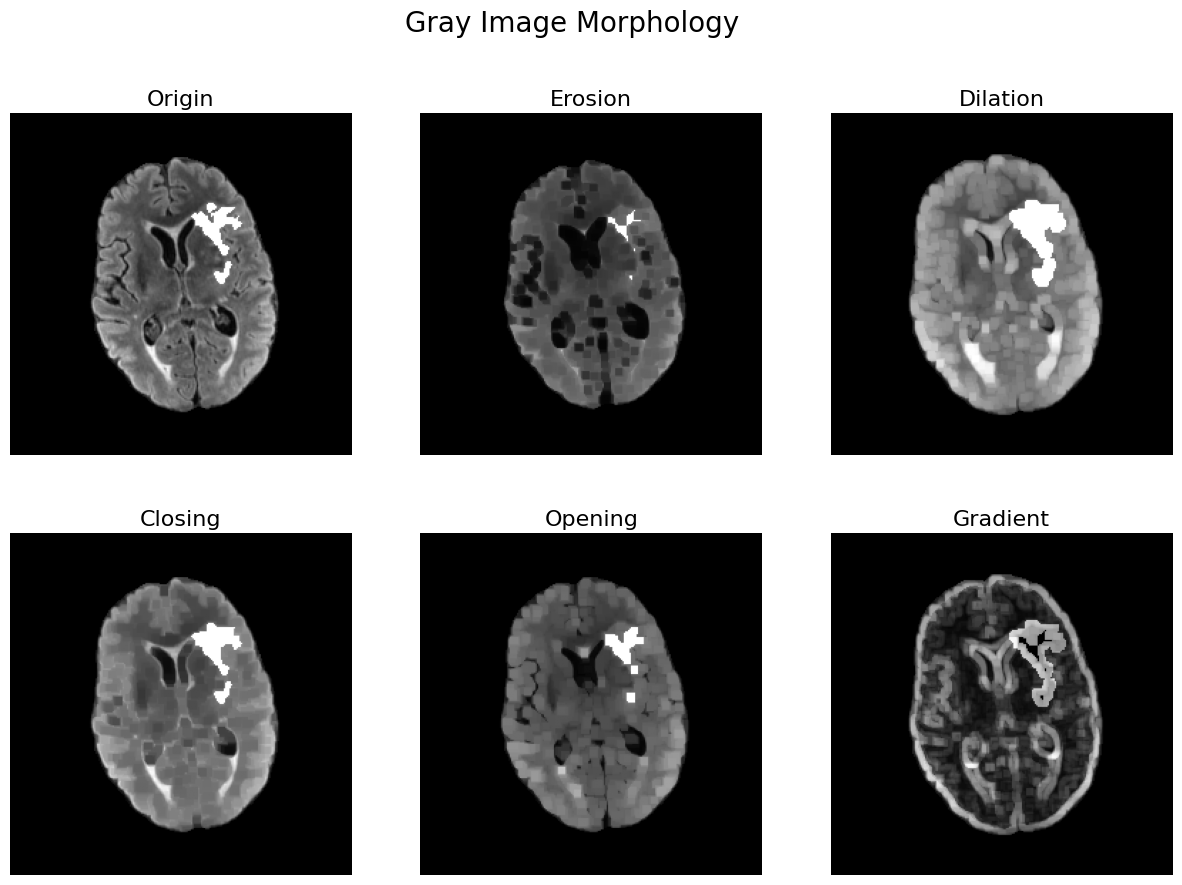

In [ ]:
results_erosion = erosion(img_slice, square(5))
results_dilation = dilation(img_slice, square(5))
results_closing = closing(img_slice, square(5))
results_opening = opening(img_slice, square(5))
results_gradient = ndimage.morphological_gradient(img_slice, size=(5,5))

fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(results_erosion, cmap='gray'); ax2.set_title("Erosion", fontsize=16); ax2.axis('off')
ax3.imshow(results_dilation, cmap='gray'); ax3.set_title("Dilation", fontsize=16); ax3.axis('off')
ax4.imshow(results_closing, cmap='gray'); ax4.set_title("Closing", fontsize=16); ax4.axis('off')
ax5.imshow(results_opening, cmap='gray'); ax5.set_title("Opening", fontsize=16); ax5.axis('off')
ax6.imshow(results_gradient, cmap='gray'); ax6.set_title("Gradient", fontsize=16); ax6.axis('off')

fig.suptitle('Gray Image Morphology', fontsize=20)
plt.show()


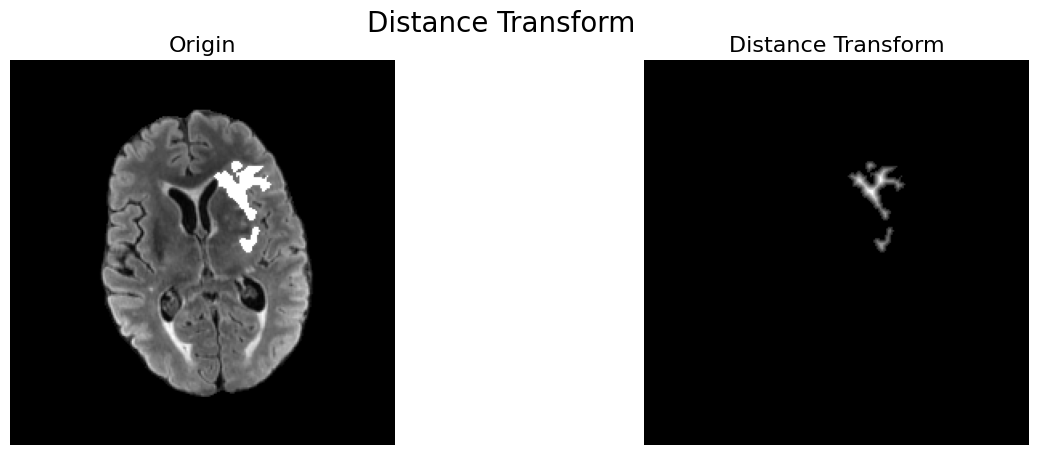

In [ ]:
from scipy.ndimage import distance_transform_edt

result_distance_transform_edt = distance_transform_edt(seg_slice)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result_distance_transform_edt, cmap='gray'); ax2.set_title("Distance Transform", fontsize=16); ax2.axis('off')
fig.suptitle('Distance Transform', fontsize=20)
plt.show()


In [ ]:
!pip install scikit-fmm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.5/467.5 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-fmm: filename=scikit_fmm-2025.1.29-cp311-cp311-linux_x86_64.whl size=76753 sha256=9e4547a582a2869010360c2c13802f220beb71de8b3a8b30dd80fbffe0dd9f51
  Stored in directory: /root/.cache/pip/wheels/14/05/7a/0787c9284f280d618f37accc667b55f8016549811850d43a9b
Successfully built scikit-fmm


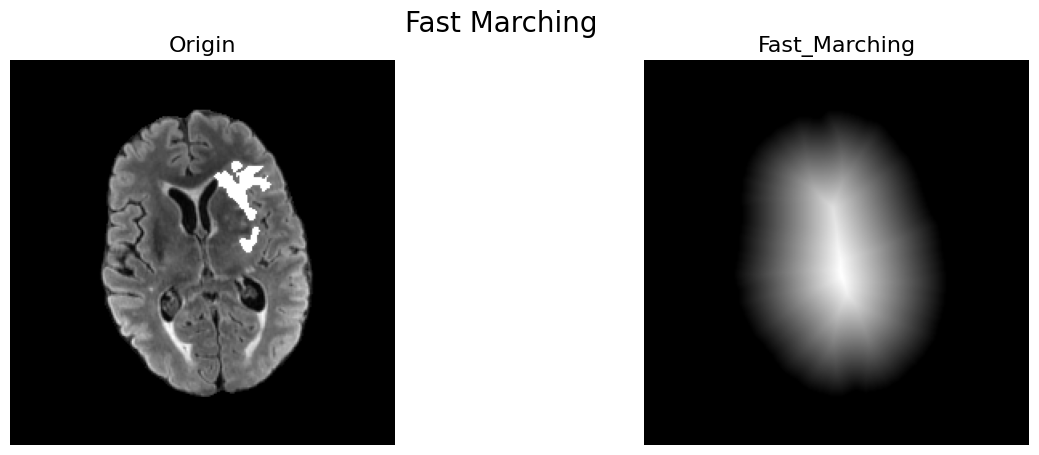

In [ ]:
import skfmm

result = skfmm.distance(img_slice, dx=1e-2)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result, cmap='gray'); ax2.set_title("Fast_Marching", fontsize=16); ax2.axis('off')
fig.suptitle('Fast Marching', fontsize=20)
plt.show()